In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

from matplotlib import cm
import matplotlib.colors as colors

In [2]:
def read_file(file):
    with open(file) as f:
        lines = f.readlines()
        
    size = len(lines) - 15
    
    data = np.empty(shape=(size, 2), dtype=np.float64)
    for i, line in enumerate(lines[15:]):
        d = line.split(',')
        data[i][0] = d[0]
        data[i][1] = d[3]
    
    data = data.T
    
    return data

In [22]:
def plot_spectrogram(d, fs=10, nperseg=200, title=None):
    f, t, Zxx = signal.stft(d[1], fs, nperseg=nperseg)
    sig = np.abs(Zxx)
    
    fig, ax = plt.subplots(2, 1, figsize=(12,10))
    ax0 = plt.subplot(211)
    ax0.plot(d[0]/10, d[1]*1000, 'b', alpha=0.8)
    ax0.set_ylabel('Transmitted Power (mW)', fontsize=14)
    
    ax1 = plt.subplot(212)
    im = ax1.pcolormesh(t, f, sig, shading='nearest', cmap=cm.binary, norm=colors.LogNorm(vmin=sig.min(), vmax=sig.max()))
    ax1.set_xlabel('TIme (s)', fontsize=14)
    ax1.set_ylabel('Frequency (Hz)', fontsize=14)    
#     cbar = plt.colorbar(im)
    
    if title is not None:
        ax0.set_title(title, fontsize=14)
    
    for ax in [ax0, ax1]:
        ax.set_xlim([t.min(), t.max()])

In [4]:
d = read_file(r'C:\Users\yuhan\OneDrive\Documents\Thorlabs\Optical Power Monitor\20220829_SM600_newflame_pull_1.csv')

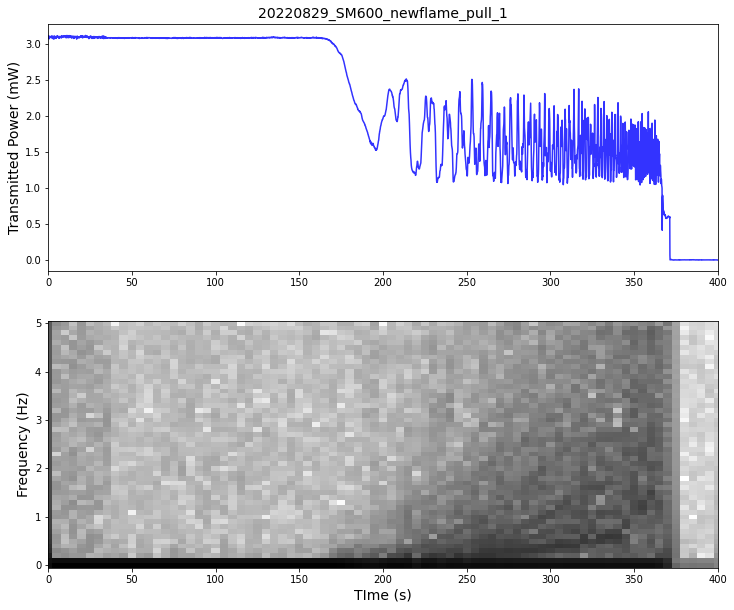

In [21]:
plot_spectrogram(d, 10, 100, title='20220829_SM600_newflame_pull_1')

In [132]:
d = read_file(r'C:\Users\yuhan\OneDrive\Documents\Thorlabs\Optical Power Monitor\20220907_SM600_oldflame_taper_1.csv')

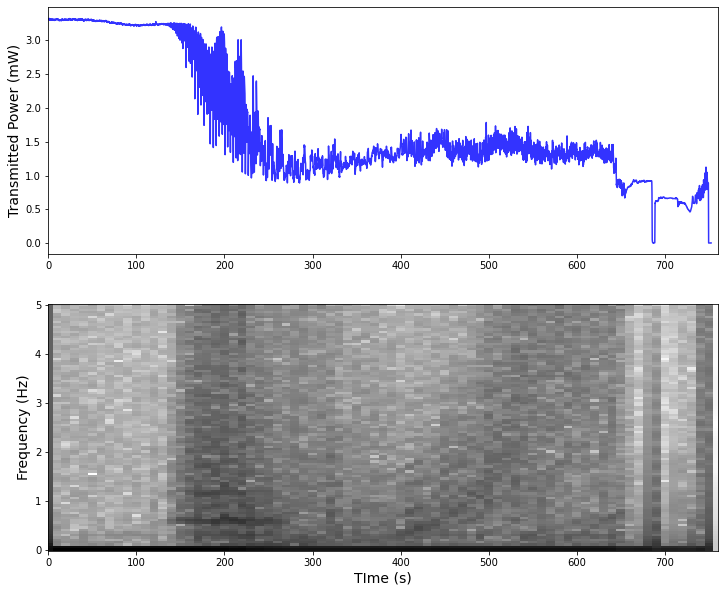

In [133]:
plot_spectrogram(d)

In [135]:
d = read_file(r'C:\Users\yuhan\OneDrive\Documents\Thorlabs\Optical Power Monitor\20220825_SM600_newflame_pull_0.csv')
d_plot = d[:, 0:6200]

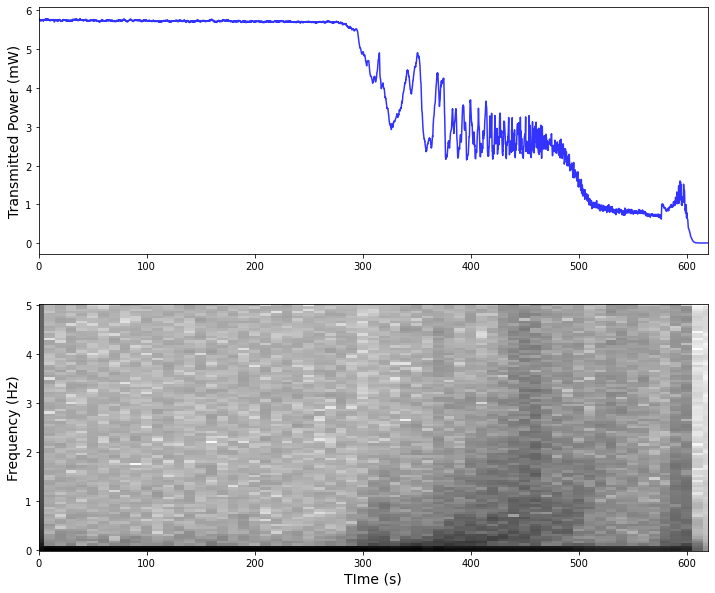

In [136]:
plot_spectrogram(d_plot, nsperseg=100)